In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,minmax_scale,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.metrics import f1_score,classification_report,confusion_matrix,RocCurveDisplay,roc_curve,auc
from lightgbm import LGBMClassifier,Dataset,train
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
data=pd.read_csv("heart_disease_uci.csv")

In [3]:
data

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
data=data.drop(columns=['id','dataset'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [6]:
data.describe()

,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   cp        920 non-null    object 
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    object 
 6   restecg   918 non-null    object 
 7   thalch    865 non-null    float64
 8   exang     865 non-null    object 
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    object 
 11  ca        309 non-null    float64
 12  thal      434 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 100.8+ KB


In [8]:
encoders={}
for col in data.columns:
    if data[col].dtypes == 'O':
        encoder=LabelEncoder()
        encoder.fit(data[col])
        encoders[col]=encoder
        data[col]=encoder.transform(data[col])

In [9]:
encoders['fbs'].transform([np.nan])

array([2])

In [10]:
for key,values in encoders.items():
    print(key,' ',values.classes_)

sex   ['Female' 'Male']
cp   ['asymptomatic' 'atypical angina' 'non-anginal' 'typical angina']
fbs   [False True nan]
restecg   ['lv hypertrophy' 'normal' 'st-t abnormality' nan]
exang   [False True nan]
slope   ['downsloping' 'flat' 'upsloping' nan]
thal   ['fixed defect' 'normal' 'reversable defect' nan]


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    int32  
 2   cp        920 non-null    int32  
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       920 non-null    int32  
 6   restecg   920 non-null    int32  
 7   thalch    865 non-null    float64
 8   exang     920 non-null    int32  
 9   oldpeak   858 non-null    float64
 10  slope     920 non-null    int32  
 11  ca        309 non-null    float64
 12  thal      920 non-null    int32  
 13  num       920 non-null    int64  
dtypes: float64(5), int32(7), int64(2)
memory usage: 75.6 KB


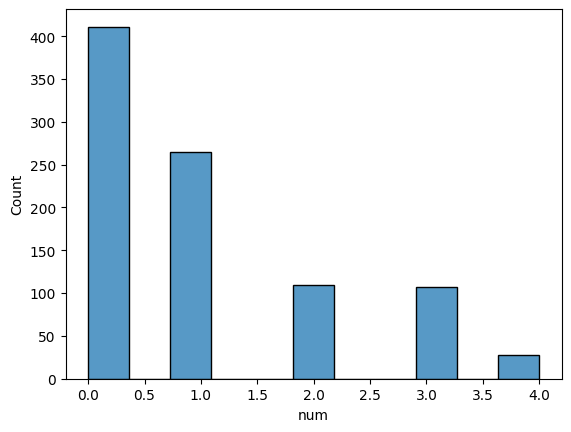

In [12]:
sns.histplot(data,x='num');

In [13]:
def transform_labels(x):
    if x ==0:
        return 0
    else:
        return 1

In [14]:
data['num']=data['num'].apply(transform_labels)

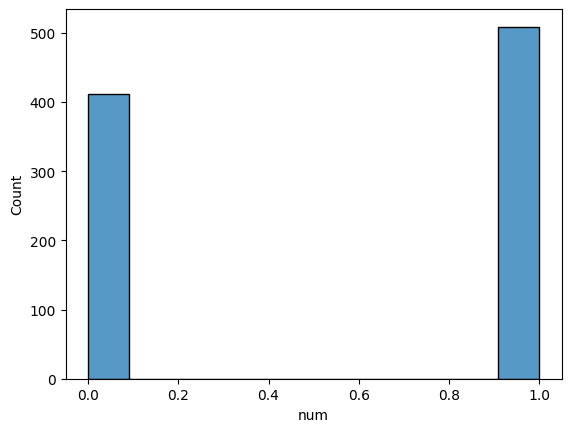

In [15]:
sns.histplot(data,x='num');

In [16]:
X=data.drop('num',axis=1)
y=data['num']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
#X_eval, X_test, y_eval, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [18]:
params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "objective":'binary',
        "is_unbalance":True,
        "verbosity": -1,
    }

lgtrain = Dataset(X_train, label = y_train)
lgval = Dataset(X_test, label = y_test)
model = train(params, lgtrain, 10000, valid_sets=[lgval], early_stopping_rounds=200, verbose_eval=50)

D:\Learning-materials\Data-Sience-BootCamp\Bootcamp-Project-5\venv\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Learning-materials\Data-Sience-BootCamp\Bootcamp-Project-5\venv\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 200 rounds
[50]	valid_0's binary_logloss: 0.518247
[100]	valid_0's binary_logloss: 0.641984
[150]	valid_0's binary_logloss: 0.76015
[200]	valid_0's binary_logloss: 0.878361
Early stopping, best iteration is:
[22]	valid_0's binary_logloss: 0.467189


In [19]:
y_pred=model.predict(X_test)
y_pred.shape

(92,)

In [20]:
y_pred

array([0.06085064, 0.09902999, 0.91962977, 0.89293662, 0.45772786,
       0.12704473, 0.06288226, 0.91959723, 0.63862765, 0.30240263,
       0.82607251, 0.92163925, 0.76923747, 0.86803563, 0.84747052,
       0.24179504, 0.06056005, 0.35901826, 0.420858  , 0.88394511,
       0.09197378, 0.20662311, 0.93820624, 0.83806697, 0.82910415,
       0.89270977, 0.90417554, 0.16402121, 0.53664964, 0.11023183,
       0.25688788, 0.36438838, 0.12185333, 0.85816001, 0.06957147,
       0.68778848, 0.13334292, 0.30349306, 0.74670259, 0.54020614,
       0.82774827, 0.25349749, 0.84352949, 0.1056902 , 0.67063655,
       0.7216359 , 0.95254056, 0.70649186, 0.80297968, 0.3290573 ,
       0.82399803, 0.09466297, 0.39156479, 0.77792259, 0.18156068,
       0.7866466 , 0.91802667, 0.13301797, 0.91651399, 0.93134894,
       0.12051332, 0.08370853, 0.83851416, 0.92801503, 0.14536913,
       0.77616172, 0.24934628, 0.69102808, 0.95407447, 0.58762534,
       0.73941766, 0.10514643, 0.83493013, 0.05992774, 0.45099

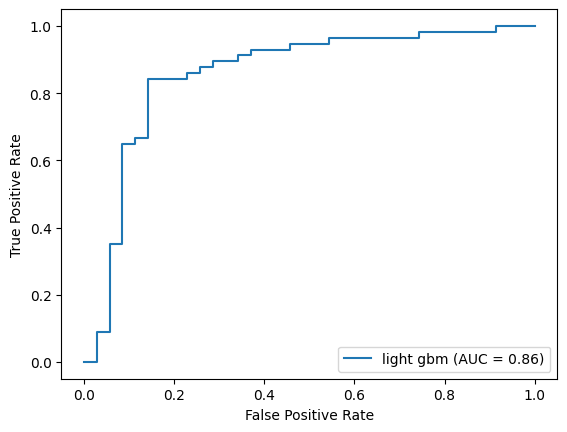

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,estimator_name='light gbm')
display.plot()
plt.show()

In [22]:
gmean = np.sqrt(tpr * (1 - fpr))
index = np.argmax(gmean)
threshold = round(thresholds[index], ndigits = 4)
threshold

0.421

In [23]:
y_pred=[0 if i < threshold else 1 for i in y_pred ]
y_pred

[0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [24]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        35
           1       0.91      0.84      0.87        57

    accuracy                           0.85        92
   macro avg       0.84      0.85      0.84        92
weighted avg       0.85      0.85      0.85        92



In [25]:
print(f1_score(y_test,y_pred,average='weighted'))

0.849172096998184


In [27]:
model.predict([[23,0,1,1,1,1,1,1,1,1,1,1,1]])[0]

0.33575183456504404

In [25]:
with open('model.pkl', 'wb') as file:

    pickle.dump(model, file)

In [26]:
for key,value in encoders.items():
    with open(str(key)+'.pkl', 'wb') as file:
        pickle.dump(value, file)

In [27]:
for key,val in encoders.items():
    print(key)

sex
cp
fbs
restecg
exang
slope
thal


In [28]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [29]:
model.predict([[23,0,1,1,1,1,1,1,1,1,1,1,1]])

array([0.33575183])